In [1]:
#required libraries as mentioned in the project walkthrough slides
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import requests
import re  
import json
import matplotlib.pyplot as plt
import os
import datetime
from timeit import default_timer as timer
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data Gathering

*importing file 1 (twitter-archive-enhanced.csv)

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


*importing file 2 (image-predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
folder_name = 'images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb')  as file:
          file.write(response.content)

image_predictions = pd.read_csv('images/image-predictions.tsv', sep='\t')

*importing file3 (retweet_count, favorite_count, tweet_id) from API

In [4]:

# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = twitter_archive_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

json_data_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        json_data_list.append({'tweet_id':tweet_id,
                       'retweet_counts': retweet_count,
                       'fav_counts': fav_count})
        
favs_tweets_data = pd.DataFrame(json_data_list)
favs_tweets_data.sample(10)
    

,fav_counts,retweet_counts,tweet_id
1868,4037,1878,675149409102012420
809,11746,5912,771380798096281600
2081,1202,295,670811965569282048
1262,3250,1215,709918798883774466
1582,2449,695,687096057537363968
1159,4236,1374,723912936180330496
1371,3755,1106,701981390485725185
582,0,4581,800188575492947969
776,2045,179,776088319444877312
221,0,5513,849668094696017920


Quality

twitter_archive_enhanced
* missing some names (745 of none values). 
* ratings are out of range for the rating_numerator as max is 1776.
* expanded url doubled in one cell.
* timestamp, tweet_id type is not correct.


image_predictions
* No. of tweed_id, pics values not similar that in twitter_archive_enhanced.
* tweet_id type is not correct

favs_tweets_data
* No. of tweet_id should be matched with the prediction table which is the lowest.
* tweet_id type is not correct


In [5]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive_enhanced.info()
twitter_archive_enhanced.doggo.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None     2259
doggo      97
Name: doggo, dtype: int64

In [7]:
twitter_archive_enhanced.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [8]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
an              7
Bailey          7
Toby            7
Daisy           7
Jax             6
Scout           6
Stanley         6
Koda            6
Milo            6
Oscar           6
Bella           6
Dave            6
Jack            6
Leo             6
Rusty           6
Sunny           5
             ... 
Naphaniel       1
Longfellow      1
Sweets          1
Gordon          1
Bilbo           1
Birf            1
Brandonald      1
Tedders         1
Rose            1
Flash           1
Timofy          1
Brandi          1
Severus         1
Strider         1
Jessifer        1
Staniel         1
Jomathan        1
Meera           1
Opie            1
Torque          1
Oreo            1
Tater           1
Cecil           1
Asher           1
Arlo      

In [9]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [12]:
image_predictions.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [13]:
image_predictions.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [14]:
favs_tweets_data

,fav_counts,retweet_counts,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [15]:
favs_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
fav_counts        2354 non-null int64
retweet_counts    2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Assessing

Tidiness

twitter_archive_enhanced

* dogs calssifications are distributed over three columns while it should be in one column only.

image_predictions

* columns of p1, p2, p3 and p1dog,..etc should be only two columns that provide two variables.

favs_tweets_data

* retweets and favorites should be part of twitter_archive_enhanced.

Quality

twitter_archive_enhanced

* some columns like (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp), are not complete(empty), removed in tidiness, and missing data. 
* missing values in extendable_url.
* missing some names (745 of none values).
* ratings are out of range for the rating_numerator as max is 1776.
* timestamp, tweet_id type is not correct.
* text column includes the url of the post merged with the text.
* duplicated tweet_id .

image_predictions

* columns of p1, p2, p3 and p1dog,..etc need to be more discriptive (already done in tidiness).
* No. of tweed_id, pics values not similar that in twitter_archive_enhanced (during joing is covered).
* tweet_id type is not correct.

favs_tweets_data

* No. of tweet_id should be matched with the prediction table which is the lowest.
* tweet_id type is not correct

* duplicated tweet_id in the final table.

Cleaning

In [16]:
twitter_archived_clean = twitter_archive_enhanced.copy()
prediction_clean = image_predictions.copy()
favs_tweets_data_clean = favs_tweets_data.copy()


Missing Data & Tidiness

* retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, are not complete(empty). 

Define
* drop columns that are empty and dont add value

In [17]:

twitter_archived_clean = twitter_archived_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp',
                                     'in_reply_to_status_id','in_reply_to_user_id'])

Test

In [18]:
list(twitter_archived_clean)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

* dogs calssifications are distributed over three columns while it should be in one column only

Define

* melt the twitter_archived_clean dataframe to contain only one column named'dog_classification'

Code

In [19]:
twitter_archived_clean = pd.melt(twitter_archived_clean, id_vars=['tweet_id', 'timestamp','source', 'text','expanded_urls','rating_numerator','rating_denominator','name'],
                                var_name = 'type', value_name = 'dog_classification')

twitter_archived_clean=twitter_archived_clean.drop(columns = 'type')
twitter_archived_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [20]:
twitter_archived_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 9 columns):
tweet_id              9424 non-null int64
timestamp             9424 non-null object
source                9424 non-null object
text                  9424 non-null object
expanded_urls         9188 non-null object
rating_numerator      9424 non-null int64
rating_denominator    9424 non-null int64
name                  9424 non-null object
dog_classification    9424 non-null object
dtypes: int64(3), object(6)
memory usage: 662.7+ KB


In [21]:
twitter_archived_clean = twitter_archived_clean.sort_values('tweet_id').drop_duplicates(['tweet_id','dog_classification'], keep = 'first')

Test

In [22]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 4711 to 7068
Data columns (total 9 columns):
tweet_id              2750 non-null int64
timestamp             2750 non-null object
source                2750 non-null object
text                  2750 non-null object
expanded_urls         2685 non-null object
rating_numerator      2750 non-null int64
rating_denominator    2750 non-null int64
name                  2750 non-null object
dog_classification    2750 non-null object
dtypes: int64(3), object(6)
memory usage: 214.8+ KB


In [23]:
twitter_archived_clean.dog_classification.value_counts()

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_classification, dtype: int64

image_predictions

* columns of p1, p2, p3 and p1dog,..etc should be only two columns that provide two variables.

Define

* create two columns ('breed', 'confidence') using iterating by for loops throw all the 6 columns, extract only the true results based on priority P1_conf then,P 2_conf then,P3_conf while other values that are false even in P3_conf  are deleted,then convert the two columns to dataframe (dfff) which then is merged with twitter_archived_clean. 

In [24]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
p1_df = []

for n in range (len(prediction_clean)):
        if prediction_clean.p1_dog[n] == True :   
            name = prediction_clean.p1[n] 
            confidence = prediction_clean.p1_conf[n]
            tweet_id=prediction_clean.tweet_id[n]
            p1_df.append({'name':name,'confidence':confidence, 'tweet_id':tweet_id})
            p1_dff = pd.DataFrame(p1_df)
            
            
p1_dff 

p2_df = []

for n in range (len(prediction_clean)):
        if prediction_clean.p1_dog[n] == False and prediction_clean.p2_dog[n] == True  :   
            name = prediction_clean.p2[n] 
            confidence = prediction_clean.p2_conf[n]
            tweet_id=prediction_clean.tweet_id[n]
            p2_df.append({'name':name,'confidence':confidence, 'tweet_id':tweet_id})
            p2_dff = pd.DataFrame(p2_df)      
p2_dff 

p3_df = []

for n in range (len(prediction_clean)):
        if prediction_clean.p1_dog[n] == False and prediction_clean.p2_dog[n] == False and prediction_clean.p3_dog[n] == True:   
            name = prediction_clean.p3[n] 
            confidence = prediction_clean.p3_conf[n]
            tweet_id=prediction_clean.tweet_id[n]
            p3_df.append({'name':name,'confidence':confidence, 'tweet_id':tweet_id})
            
        elif prediction_clean.p3_dog[n] == False:
            p3_df.append({'name':'failed_prediction','confidence':confidence, 'tweet_id':tweet_id})
            p3_dff = pd.DataFrame(p3_df)
p3_dff




,confidence,name,tweet_id
0,0.168086,failed_prediction,891689557279858688
1,0.168086,failed_prediction,891689557279858688
2,0.007959,golden_retriever,666057090499244032
3,0.007959,failed_prediction,666057090499244032
4,0.007959,failed_prediction,666057090499244032
5,0.007959,failed_prediction,666057090499244032
6,0.007959,failed_prediction,666057090499244032
7,0.007959,failed_prediction,666057090499244032
8,0.007959,failed_prediction,666057090499244032
9,0.007959,failed_prediction,666057090499244032


In [26]:
dfff = pd.concat([p1_dff, p2_dff], ignore_index= True)
dfff.info()
dff1 = pd.concat([p1_dff,p2_dff, p3_dff], ignore_index= True)
dff1.sort_values('tweet_id')
dff1.rename(columns={'name':'breed'}, inplace =True)
dff1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 3 columns):
confidence    1687 non-null float64
name          1687 non-null object
tweet_id      1687 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 39.6+ KB


,confidence,breed,tweet_id
0,0.465074,Welsh_springer_spaniel,666020888022790149
1,0.506826,redbone,666029285002620928
2,0.596461,German_shepherd,666033412701032449
3,0.408143,Rhodesian_ridgeback,666044226329800704
4,0.560311,miniature_pinscher,666049248165822465
5,0.651137,Bernese_mountain_dog,666050758794694657
6,0.692517,chow,666055525042405380
7,0.201493,miniature_poodle,666058600524156928
8,0.775930,golden_retriever,666063827256086533
9,0.503672,Gordon_setter,666071193221509120


* join the extracted table of the names predicted with the corresponding level of confidence to twitter archived data on basis of tweet_id 

In [27]:
archived_breeds_clean = pd.merge(twitter_archived_clean, dff1, how='left')


In [28]:
archived_breeds_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,confidence,breed
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,0.465074,Welsh_springer_spaniel
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,0.506826,redbone
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,0.596461,German_shepherd
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,0.408143,Rhodesian_ridgeback
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,0.560311,miniature_pinscher
5,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,0.651137,Bernese_mountain_dog
6,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,NaN,NaN
7,666055525042405380,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,0.692517,chow
8,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,0.007959,golden_retriever
9,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,0.007959,failed_prediction


* retweets and favorites should be part of twitter_archive_enhanced.

Define

* join table of favs_tweets_data with newly created table archived_breeds_clean on basis of tweet_id, how 'left'


Code

In [29]:
archived_breeds_favs_retweets = pd.merge(archived_breeds_clean, favs_tweets_data, on = 'tweet_id', how= 'left')

In [30]:
archived_breeds_favs_retweets

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,confidence,breed,fav_counts,retweet_counts
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,0.465074,Welsh_springer_spaniel,2535.0,532.0
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,0.506826,redbone,132.0,48.0
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,0.596461,German_shepherd,128.0,47.0
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,0.408143,Rhodesian_ridgeback,311.0,147.0
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,0.560311,miniature_pinscher,111.0,41.0
5,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,0.651137,Bernese_mountain_dog,136.0,60.0
6,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,NaN,NaN,1253.0,879.0
7,666055525042405380,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,0.692517,chow,448.0,261.0
8,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,0.007959,golden_retriever,304.0,146.0
9,666057090499244032,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,0.007959,failed_prediction,304.0,146.0


Quality issues Cleaning 

* missing some names (745 of none values).

Define

* replace the none values with null to express the real meaning.

Code


In [31]:
archived_breeds_favs_retweets.name.replace({'None':np.nan}, inplace =True)

In [32]:
archived_breeds_favs_retweets.name.value_counts()

a               93
one             45
Opal            39
Winnie          39
Ralphson        36
Milo            32
Ozzie           26
Albus           21
Oakley          21
Charles         20
Lenny           19
Amélie          18
Mack            18
Samson          15
Zoey            15
Snoop           14
Cooper          14
Bruce           14
unacceptable    14
Oliver          14
Charlie         13
Bailey          13
Bo              13
Lucy            12
Lola            11
Koko            11
Cedrick         10
Winston         10
the             10
Penny           10
                ..
Storkson         1
Grizzie          1
Ralphie          1
Edgar            1
Mitch            1
Sunshine         1
Bobb             1
Jim              1
Joshwa           1
Ruffles          1
Peanut           1
Sojourner        1
Dunkin           1
Amy              1
Herb             1
Beckham          1
Tilly            1
Striker          1
Iggy             1
Naphaniel        1
Dutch            1
Carll       

* ratings are out of range for the rating_numerator as max is 1776.

Define

* Consider each rating_numerator higher than 20 as null as it has no meaning.


In [33]:
archived_breeds_favs_retweets.rating_numerator.describe()

count    3402.000000
mean       12.301881
std        38.213944
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [34]:
archived_breeds_favs_retweets.loc[archived_breeds_favs_retweets.rating_numerator > 20, 'rating_numerator'] = np.nan


test

In [35]:
archived_breeds_favs_retweets.rating_numerator.describe()

count    3377.000000
mean       10.614747
std         2.170446
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        20.000000
Name: rating_numerator, dtype: float64

# * timestamp, tweet_id type is not correct.
Define

*chnage time stamp type to_datetime to be easy to handled

In [36]:
archived_breeds_favs_retweets.timestamp  = pd.to_datetime(archived_breeds_favs_retweets.timestamp)

test 

In [37]:
archived_breeds_favs_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3401
Data columns (total 13 columns):
tweet_id              3402 non-null int64
timestamp             3402 non-null datetime64[ns]
source                3402 non-null object
text                  3402 non-null object
expanded_urls         3337 non-null object
rating_numerator      3377 non-null float64
rating_denominator    3402 non-null int64
name                  2311 non-null object
dog_classification    3402 non-null object
confidence            2685 non-null float64
breed                 2685 non-null object
fav_counts            3399 non-null float64
retweet_counts        3399 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 372.1+ KB


* columns of p1, p2, p3 and p1dog,..etc need to be more discriptive (already done in tidiness).
Define 
* It has been covered in tidiness and two new columns created under the names of breeds and confidence.

* tweet_id type is not correct.
Define
* change type of tweet_id to String

In [38]:
archived_breeds_favs_retweets['tweet_id']=archived_breeds_favs_retweets.tweet_id.astype(str)

In [39]:
archived_breeds_favs_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3401
Data columns (total 13 columns):
tweet_id              3402 non-null object
timestamp             3402 non-null datetime64[ns]
source                3402 non-null object
text                  3402 non-null object
expanded_urls         3337 non-null object
rating_numerator      3377 non-null float64
rating_denominator    3402 non-null int64
name                  2311 non-null object
dog_classification    3402 non-null object
confidence            2685 non-null float64
breed                 2685 non-null object
fav_counts            3399 non-null float64
retweet_counts        3399 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 372.1+ KB


In [40]:
archived_breeds_favs_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3401
Data columns (total 13 columns):
tweet_id              3402 non-null object
timestamp             3402 non-null datetime64[ns]
source                3402 non-null object
text                  3402 non-null object
expanded_urls         3337 non-null object
rating_numerator      3377 non-null float64
rating_denominator    3402 non-null int64
name                  2311 non-null object
dog_classification    3402 non-null object
confidence            2685 non-null float64
breed                 2685 non-null object
fav_counts            3399 non-null float64
retweet_counts        3399 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 372.1+ KB


* duplicated tweet_id

Define 
* apply drop_duplicate and then sort the values by time stamp

In [41]:
archived_breeds_favs_retweets.duplicated('tweet_id').value_counts()

False    2356
True     1046
dtype: int64

In [42]:
archived_breeds_favs_retweets.drop_duplicates('tweet_id', keep='first', inplace=True)


In [43]:
archived_breeds_favs_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 3401
Data columns (total 13 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2332 non-null float64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_classification    2356 non-null object
confidence            1751 non-null float64
breed                 1751 non-null object
fav_counts            2354 non-null float64
retweet_counts        2354 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 257.7+ KB


In [44]:
archived_breeds_favs_retweets.sort_values(by=['timestamp'])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_classification,confidence,breed,fav_counts,retweet_counts
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,None,0.465074,Welsh_springer_spaniel,2535.0,532.0
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,None,0.506826,redbone,132.0,48.0
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,None,0.596461,German_shepherd,128.0,47.0
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,None,0.408143,Rhodesian_ridgeback,311.0,147.0
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,None,0.560311,miniature_pinscher,111.0,41.0
5,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10,a,None,0.651137,Bernese_mountain_dog,136.0,60.0
6,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2.0,10,an,None,NaN,NaN,1253.0,879.0
7,666055525042405380,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10.0,10,a,None,0.692517,chow,448.0,261.0
8,666057090499244032,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9.0,10,a,None,0.007959,golden_retriever,304.0,146.0
30,666058600524156928,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,10,the,None,0.201493,miniature_poodle,115.0,61.0


Storing data

In [45]:
archived_breeds_favs_retweets_final = archived_breeds_favs_retweets.copy()


out_file = 'archived_breeds_favs_retweets_final.csv'
archived_breeds_favs_retweets_final.to_csv(out_file, index=False)

Analysis

* which dog breed' post is the most retweeted post and how many retweets?.

In [46]:
archived_breeds_favs_retweets.retweet_counts.max()

79515.0

In [47]:
indexes_of_most_retweets = archived_breeds_favs_retweets.index[archived_breeds_favs_retweets['retweet_counts'] == 79515.0].tolist()
indexes_of_most_retweets

[1944]

In [48]:
archived_breeds_favs_retweets.loc[indexes_of_most_retweets[0:2], 'breed']

1944    Labrador_retriever
Name: breed, dtype: object

Answer 

* the most retweeted post was related to the dog breed 'Labrador_retriever' and it was retweeted 79515.0 times.


Picture of Labrador_retriever


In [49]:
archived_breeds_favs_retweets.loc[indexes_of_most_retweets[0:2], 'tweet_id']

1944    744234799360020481
Name: tweet_id, dtype: object

In [50]:
prediction_clean.index[prediction_clean['tweet_id'] == 744234799360020481].tolist()

[1221]

In [51]:
prediction_clean.loc[1221, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

You can find its pic in the following URL 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'


* Description about rating over 10


In [52]:
archived_breeds_favs_retweets.rating_numerator.describe()

count    2332.000000
mean       10.698113
std         2.204425
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        20.000000
Name: rating_numerator, dtype: float64

Normal distribution for ratings over 10 for all dogs, ignoring the nan values above 20.

<module 'seaborn' from '/opt/conda/lib/python3.6/site-packages/seaborn/__init__.py'>

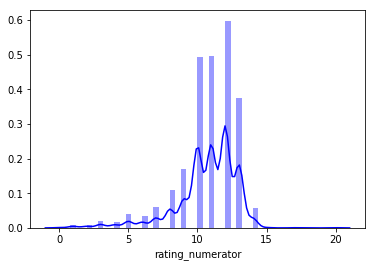

In [53]:

sns.distplot(archived_breeds_favs_retweets.rating_numerator.dropna(), color = 'blue', label = 'ratings/10')
sns


Top 5 breeds posted 


In [54]:
top_five_breeds = archived_breeds_favs_retweets.breed.value_counts().head()
top_five_breeds

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
Name: breed, dtype: int64

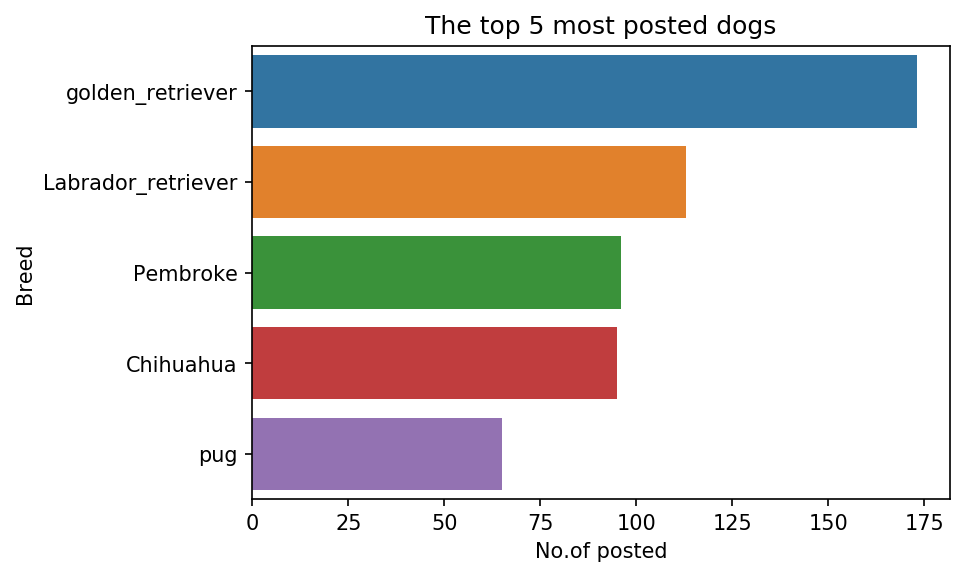

In [55]:
top_five_breeds = archived_breeds_favs_retweets.breed.value_counts().head().to_frame().reset_index().rename(columns={'index': 'dog_breed', 'breed': 'total_posts'})

plt.figure(dpi=150);
ax = sns.barplot(x='total_posts', y='dog_breed', data=top_five_breeds);
ax.set_title('The top 5 most posted dogs');
ax.set_ylabel('Breed');
ax.set_xlabel('No.of posted');

starting from golden_retriever the most posted dog arriving to pug these are the top 5 dogs posted as shown in the figure

The most year over the three years with tweets 2016 with 1183 tweets.


In [56]:
archived_breeds_favs_retweets['timestamp'].dt.year.mode()[0]


2016

In [57]:
archived_breeds_favs_retweets['timestamp'].dt.year.value_counts()

2016    1183
2015     690
2017     483
Name: timestamp, dtype: int64

In [58]:
archived_breeds_favs_retweets['timestamp'].dt.month.value_counts()

12    458
11    390
1     288
2     213
3     205
7     161
6     156
4     120
5     116
10     88
9      84
8      77
Name: timestamp, dtype: int64

* December is the most month when ppl post about there dogs on tweeter (458),
august is the lowest (77)


In [59]:
archived_breeds_favs_retweets['timestamp'].dt.month.value_counts().describe()

count     12.000000
mean     196.333333
std      123.760277
min       77.000000
25%      109.000000
50%      158.500000
75%      231.750000
max      458.000000
Name: timestamp, dtype: float64

*average is 196 tweet per month.